In [ ]:
# ===================================================== #
#                 Big Data Processing                   #
#            "Dataset Students Performance"             #
#                   Anggota Kelompok                    #
#      Kenneth Raydeon Suhandi       (2602145895)       #
#      Alden Rajendra Kumara         (2602139274)       #
#      Jason Tanwinarta              (2602144646)       #
#      Kevin Goenawan                (2602141000)       #
#      Chasis Bagoes Kusuma Poerwoto (2602144791)       #
# ===================================================== #

In [ ]:
%pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Student_performance_data _.csv'
data = pd.read_csv(file_path)

# Menunjukkan 10 row pertama
print(data.head(10))

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   
5       1006   18       0          0                  1         8.191219   
6       1007   15       0          1                  1        15.601680   
7       1008   15       1          1                  4        15.424496   
8       1009   17       0          0                  0         4.562008   
9       1010   16       1          0                  1        18.444466   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0    

In [ ]:
# Data Cleaning
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
data[categorical_columns] = data[categorical_columns].astype('category')

# Menunjukkan total baris dan kolom dalam dataset
total_rows, total_columns = data.shape
print("Jumlah Baris:", total_rows)
print("Jumlah Kolom:", total_columns)

grade_class_categories = data['GradeClass'].cat.categories

X = data.drop(columns=['StudentID', 'GradeClass'])
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
y = data['GradeClass'].cat.codes  # Convert categories to numerical codes

Jumlah Baris: 2392
Jumlah Kolom: 15


In [ ]:
# Membagi data untuk dilatih dan untuk diuji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Jumlah Data Pelatihan:", len(X_train))
print("Jumlah Data Pengujian:", len(X_test))

Jumlah Data Pelatihan: 1674
Jumlah Data Pengujian: 718


In [ ]:
# Melatih dengan model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Menghitung Accuracy dan Precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9052924791086351
Precision: 0.9089548635863561


In [ ]:
# Menunjukkan laporan klasifikasi
class_report = classification_report(y_test, y_pred, target_names=grade_class_categories.astype(str))
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43        33
         1.0       0.78      0.86      0.82        80
         2.0       0.90      0.88      0.89       121
         3.0       0.89      0.89      0.89       127
         4.0       0.94      0.99      0.96       357

    accuracy                           0.91       718
   macro avg       0.90      0.78      0.80       718
weighted avg       0.91      0.91      0.90       718



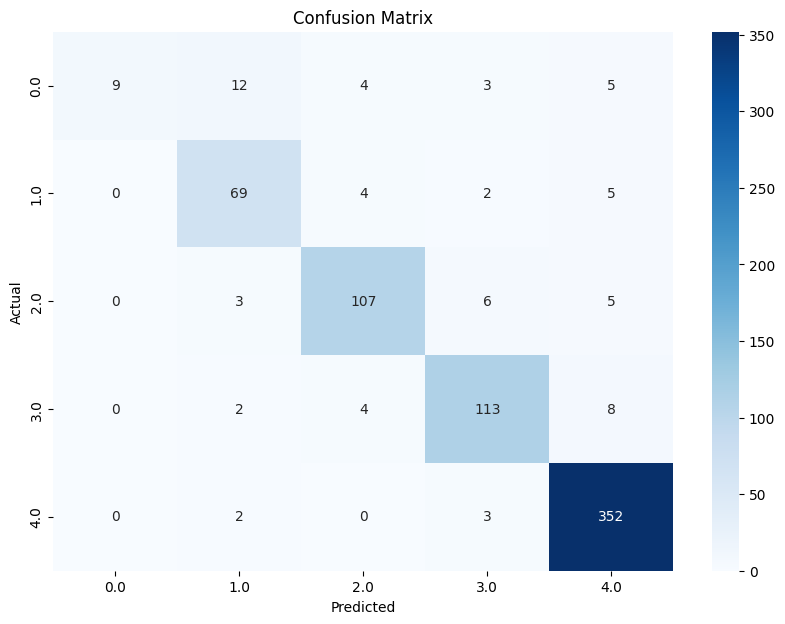

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(10, 7))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grade_class_categories, yticklabels=grade_class_categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-11-b8f417dc2b46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tutoring', data=data, palette='viridis')


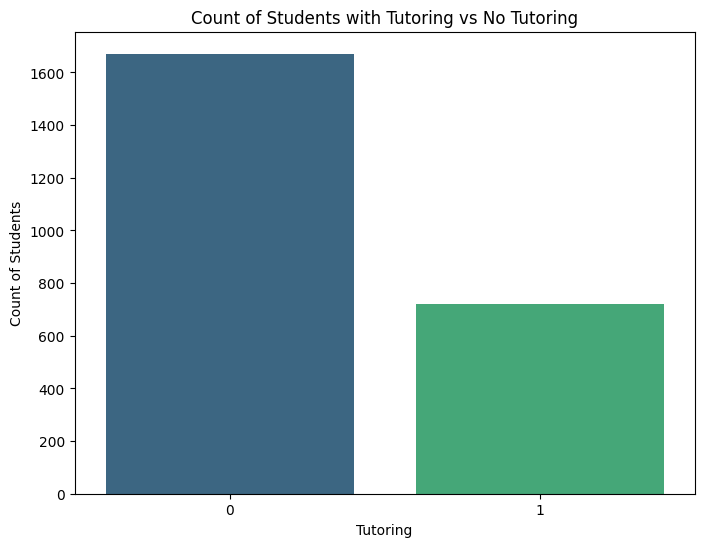

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tutoring', data=data, palette='viridis')
plt.xlabel('Tutoring')
plt.ylabel('Count of Students')
plt.title('Count of Students with Tutoring vs No Tutoring')
plt.show()

<ipython-input-14-35da6ad04fcd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ParentalSupport', data=data, palette='viridis')


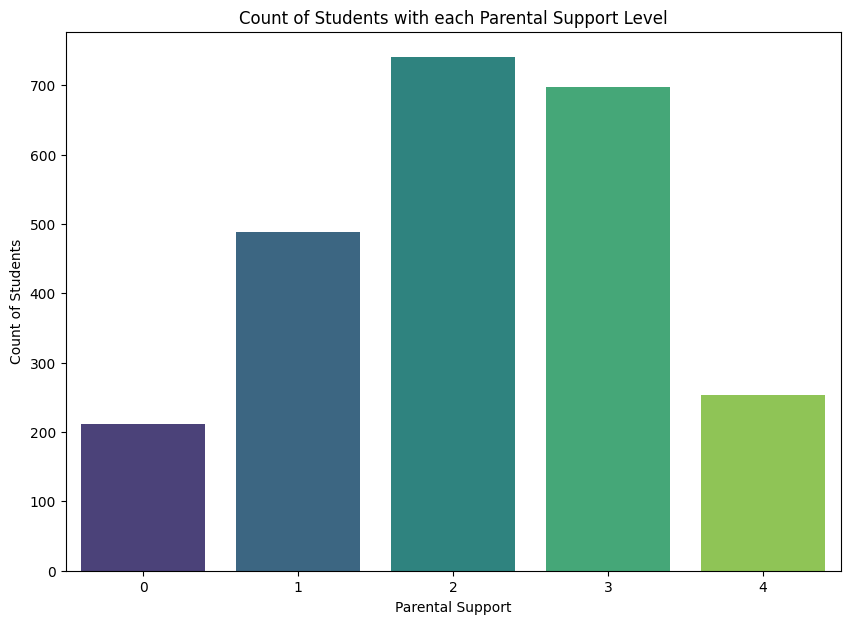

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='ParentalSupport', data=data, palette='viridis')
plt.xlabel('Parental Support')
plt.ylabel('Count of Students')
plt.title('Count of Students with each Parental Support Level')
plt.show()

<ipython-input-23-a3cd3d6cca94>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Extracurricular', data=data, palette='viridis')


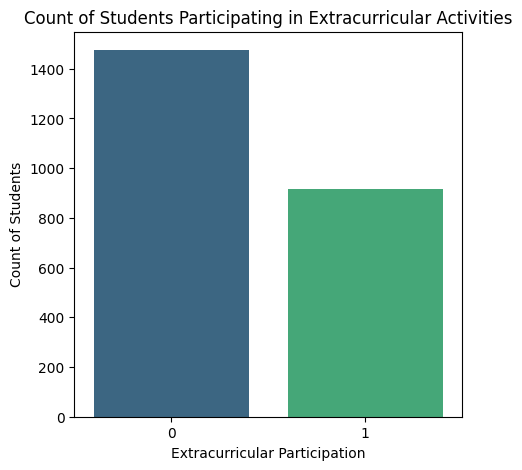

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Extracurricular', data=data, palette='viridis')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Count of Students')
plt.title('Count of Students Participating in Extracurricular Activities')
plt.show()

<ipython-input-22-64f0edc81335>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sports', data=data, palette='viridis')


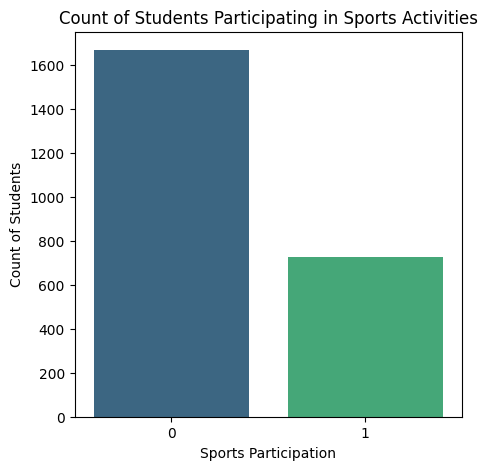

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Sports', data=data, palette='viridis')
plt.xlabel('Sports Participation')
plt.ylabel('Count of Students')
plt.title('Count of Students Participating in Sports Activities')
plt.show()

<ipython-input-21-afcfe5335790>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Music', data=data, palette='viridis')


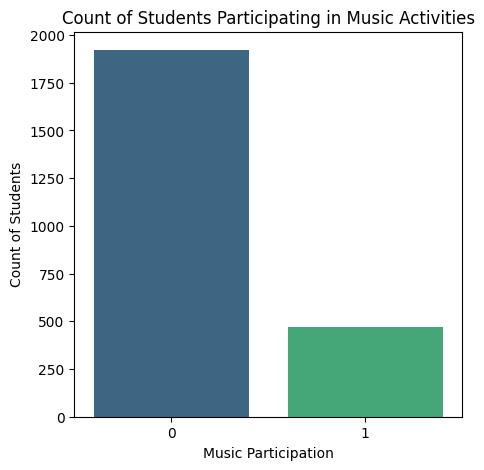

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Music', data=data, palette='viridis')
plt.xlabel('Music Participation')
plt.ylabel('Count of Students')
plt.title('Count of Students Participating in Music Activities')
plt.show()

<ipython-input-20-f1cacfd53f91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Volunteering', data=data, palette='viridis')


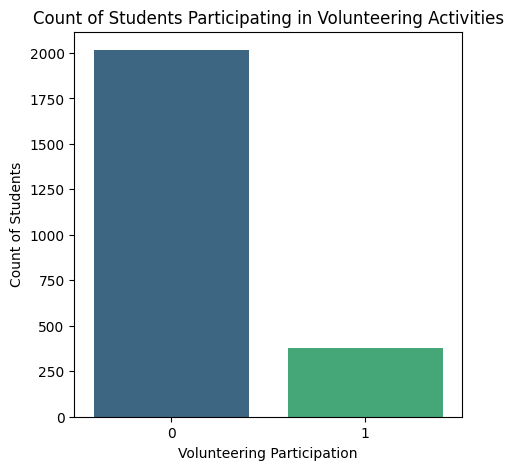

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Volunteering', data=data, palette='viridis')
plt.xlabel('Volunteering Participation')
plt.ylabel('Count of Students')
plt.title('Count of Students Participating in Volunteering Activities')
plt.show()

<ipython-input-5-acec6acfa22c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ethnicity', data=data, palette='viridis')


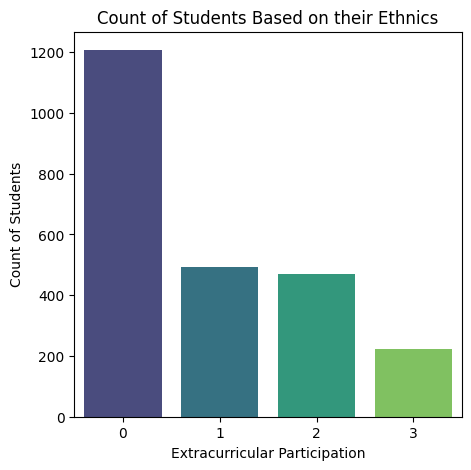

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Ethnicity', data=data, palette='viridis')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Count of Students')
plt.title('Count of Students Based on their Ethnics')
plt.show()

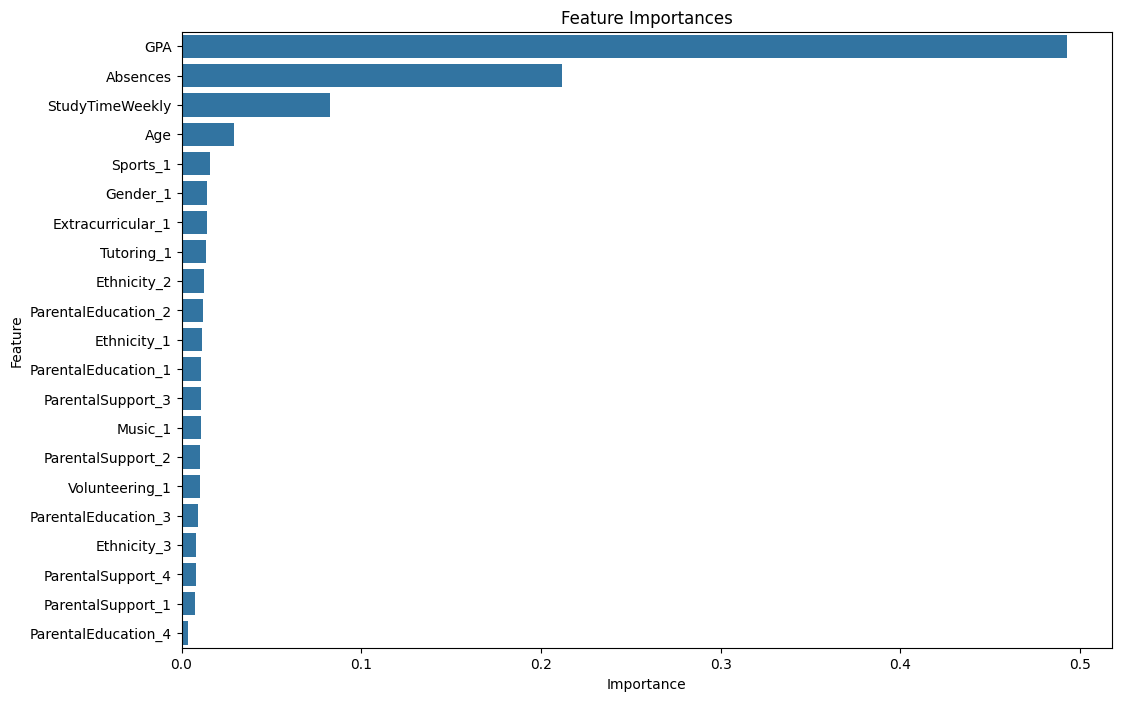

In [ ]:
# Plotting Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()